In [6]:
#pip install tensorflow==1.15
#Install stable-baselines as described in the documentation

import gym
import gym_pcgrl
from gym_pcgrl import wrappers

from stable_baselines.common.policies import MlpPolicy, CnnPolicy, FeedForwardPolicy
from stable_baselines.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines.a2c.utils import conv, linear, conv_to_fc
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import PPO2

import tensorflow as tf
import numpy as np

import pdb

model = PPO2.load("binary_narrow_limited_centered")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


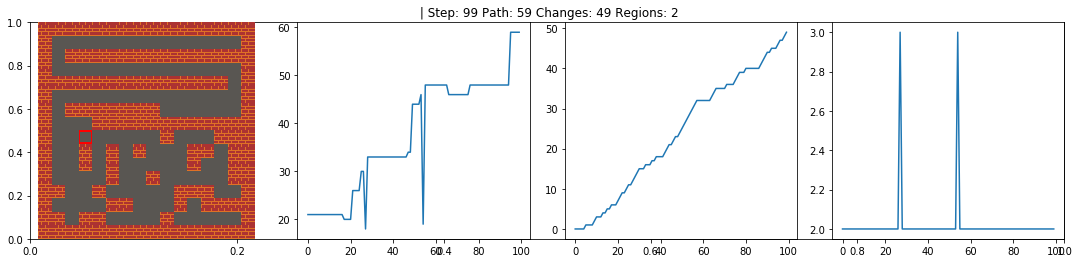

NAAAAAAY


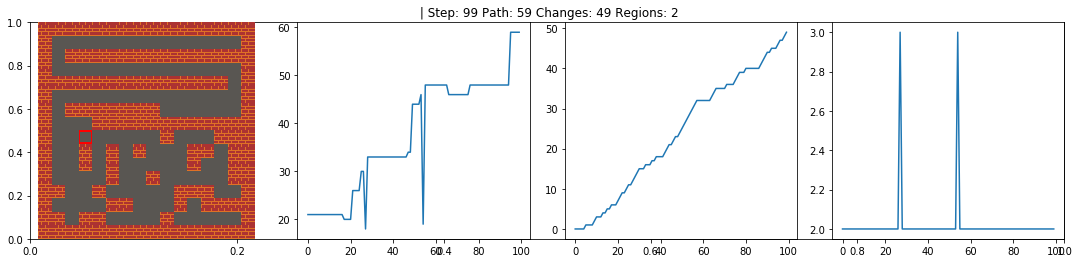

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

def show_state(env, l, c, r, step=0, name="", info=""):
    fig = plt.figure(10)
    plt.clf()
    
    plt.title("{} | Step: {} Path: {} Changes: {} Regions: {}".format(name, step, l[-1], c[-1], r[-1]))
    
    ax1 = fig.add_subplot(1,4,1)
    ax1 = plt.imshow(env.render(mode='rgb_array'))
    plt.axis('off')
    
    ax2 = fig.add_subplot(1,4,2)
    ax2 = plt.plot(l)
    
    ax3 = fig.add_subplot(1,4,3)
    ax3 = plt.plot(c)
    
    ax4 = fig.add_subplot(1,4,4)
    ax4 = plt.plot(r)
    
    
    fig.set_figwidth(15)
    plt.tight_layout()
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

def get_env():
    env = wrappers.Cropped("binary-narrow-v0", 28, random_tile=False)
    return env

env = DummyVecEnv([get_env])
# model = PPO2(CustomPolicy, env, verbose=1, tensorboard_log="./runs")


# Enjoy trained agent
path_length = []
changes = []
regions = []
obs = env.reset()
for i in range(100):
    action, _states = model.predict(obs)
    #action = np.array([env.action_space.sample()])
    obs, rewards, dones, info = env.step(action)
    path_length.append(info[0]['path-length'])
    changes.append(info[0]['changes'])
    regions.append(info[0]['regions'])
    if dones:
        print("YAAAAAAAAAAAAAY")
        break
    show_state(env, path_length, changes, regions, i)
print("NAAAAAAY")
#print(info)